In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit import register, available_backends, get_backend
from qiskit.wrapper.jupyter import *
import matplotlib.pyplot as plt
from parseRealization import *
%matplotlib inline

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
fileName="toffoli.real"
#qc.ccx(qr[0],qr[1],qr[2])
#qc.x(qr[1])
qc,qr = readGatesFromFile(fileName,qc,qr)
qc.measure(qr,cr)

In [3]:
qx_config = {
        "APItoken":"f5819f434faf55109be4d80d68984a810895c78102f2702d2851169dc7f9aa18ac03ce2e357e896df27f59455cc0f897faf4ab6ee599c2f23a16f01f521fbfb2",
        "url":"https://quantumexperience.ng.bluemix.net/api"}

#set api
#IBMQ.enable_account(qx_config['APItoken'], qx_config['url'])

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[3];
creg c0[3];
ry(1.57079632679490) q0[1];
rz(0.785398163397448) q0[0];
rz(0.785398163397448) q0[1];
rzz(-0.785398163397448) q0[0],q0[1];
ry(-1.57079632679490) q0[1];
ry(1.57079632679490) q0[1];
rz(0.785398163397448) q0[0];
rz(0.785398163397448) q0[1];
rzz(-0.785398163397448) q0[0],q0[1];
ry(-1.57079632679490) q0[1];
cx q0[2],q0[1];
ry(-1.57079632679490) q0[1];
rzz(-0.785398163397448) q0[0],q0[1];
rz(0.785398163397448) q0[1];
rz(0.785398163397448) q0[0];
ry(1.57079632679490) q0[1];
cx q0[2],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];
measure q0[2] -> c0[2];

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[3];
creg c0[3];
ry(1.57079632679490) q0[1];
rz(0.785398163397448) q0[0];
rz(0.785398163397448) q0[1];
rzz(-0.785398163397448) q0[0],q0[1];
ry(-1.57079632679490) q0[1];
ry(1.57079632679490) q0[1];
rz(0.785398163397448) q0[0];
rz(0.785398163397448) q0[1];
rzz(-0.785398163397448) q0[0],q0[1];
ry(-1.57079632679490) q0[1];
cx q0[2],q0[1];

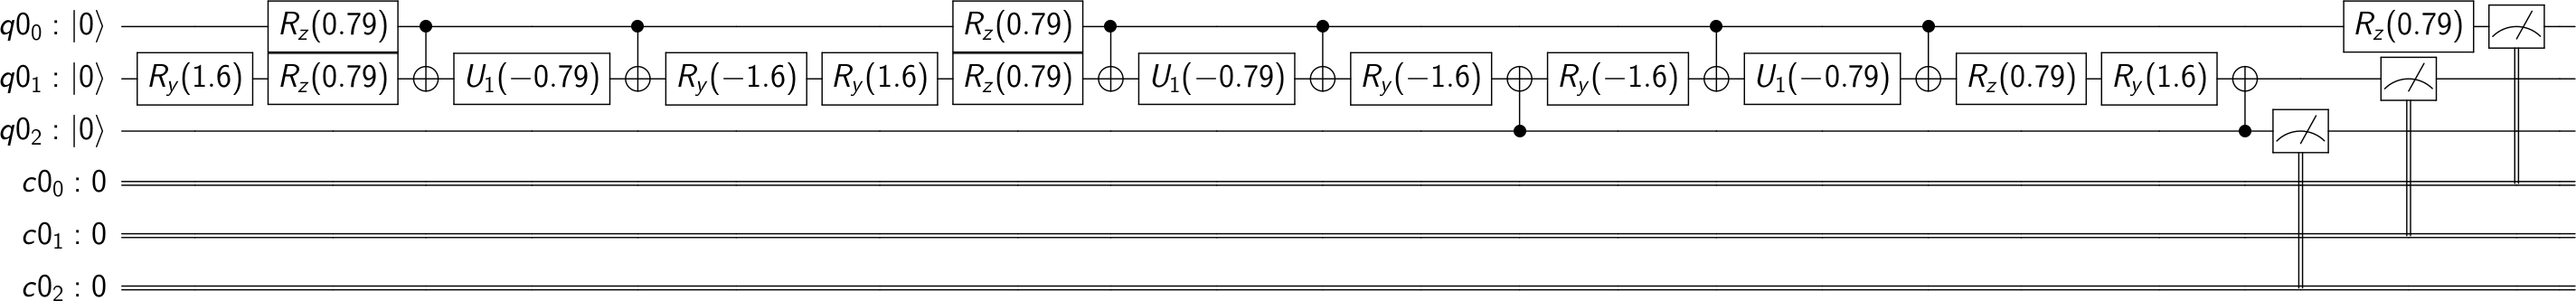

In [4]:
# Compile and run the Quantum circuit on a simulator backend
config = {
    'noise_params': {
        'relaxation_rate': 1/50, #us
        'thermal_populations': [0.99, 0.01],
        'CX': {'gate_time': 0.1},
        'U': {'gate_time': 0.01},
        'U': {'p_pauli': [0.01, 0, 0]}
    }
}
print(qc.qasm())
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)#,config)
stats_sim = job_sim.result().get_counts()
print(qc.qasm())
circuit_drawer(qc)


In [ ]:
plot_histogram(stats_sim)